C:\ProgramData\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


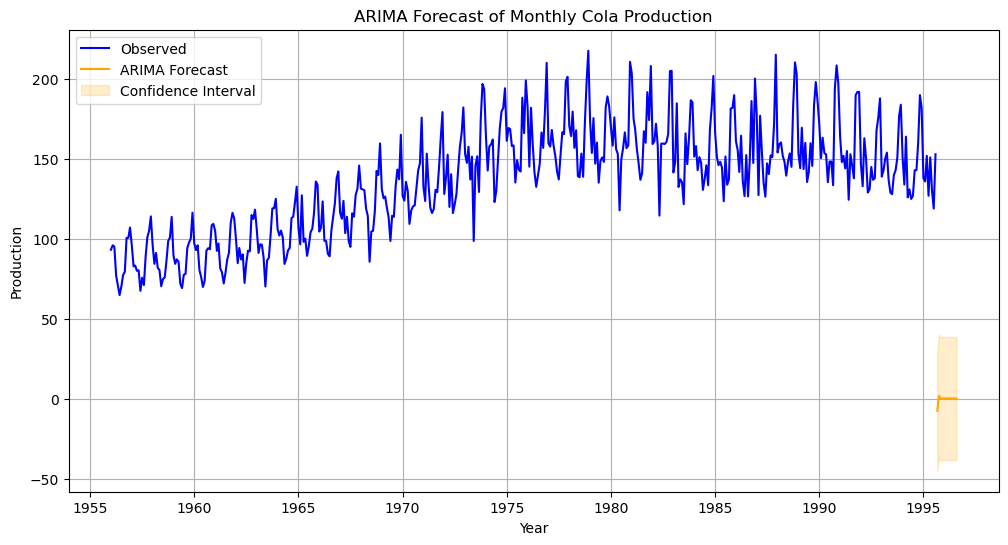

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Load the dataset
data = pd.read_csv('C:/Users/dbda/PycharmProjects/statistics/Dataset/monthly-cola-production-in-austr.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# ADF Test for stationarity
adf_test = adfuller(data['Monthly cola production'])
if adf_test[1] > 0.05:
    data_diff = data.diff().dropna()  # First-order differencing
else:
    data_diff = data

# Fit an ARIMA model
arima_model = ARIMA(data_diff['Monthly cola production'], order=(1, 1, 1))
arima_fit = arima_model.fit()

# Forecast the next 12 months
forecast_arima = arima_fit.get_forecast(steps=12)
forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(1), periods=12, freq='MS')
forecast_arima_mean = forecast_arima.predicted_mean
forecast_arima_ci = forecast_arima.conf_int()

# Plot the original data and ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(data, label="Observed", color='blue')
plt.plot(forecast_index, forecast_arima_mean, label="ARIMA Forecast", color='orange')
plt.fill_between(forecast_index, 
                 forecast_arima_ci.iloc[:, 0], 
                 forecast_arima_ci.iloc[:, 1], 
                 color='orange', alpha=0.2, label="Confidence Interval")
plt.title("ARIMA Forecast of Monthly Cola Production")
plt.xlabel("Year")
plt.ylabel("Production")
plt.legend()
plt.grid()
plt.show()


### SARIMAX

C:\ProgramData\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


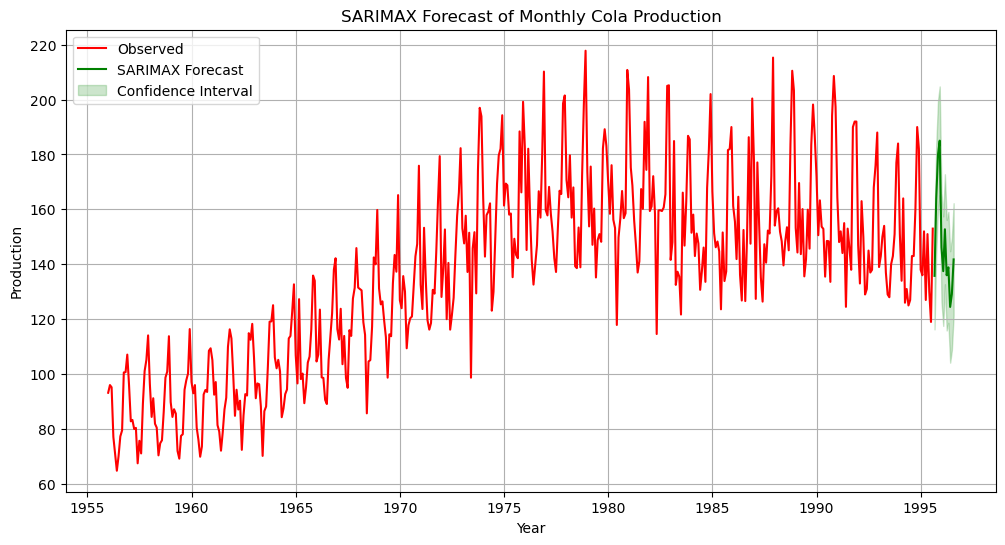

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# Load the dataset
data = pd.read_csv('C:/Users/dbda/PycharmProjects/statistics/Dataset/monthly-cola-production-in-austr.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# ADF Test for stationarity
adf_test = adfuller(data['Monthly cola production'])
if adf_test[1] > 0.05:
    data_diff = data.diff().dropna()  # First-order differencing
else:
    data_diff = data

# Fit a SARIMAX model (seasonal_order chosen arbitrarily; adjust based on your data)
sarimax_model = SARIMAX(data['Monthly cola production'], 
                        order=(1, 1, 1), 
                        seasonal_order=(1, 1, 1, 12))
sarimax_fit = sarimax_model.fit()

# Forecast the next 12 months
forecast_sarimax = sarimax_fit.get_forecast(steps=12)
forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(1), periods=12, freq='MS')
forecast_sarimax_mean = forecast_sarimax.predicted_mean
forecast_sarimax_ci = forecast_sarimax.conf_int()

# Plot the original data and SARIMAX forecast
plt.figure(figsize=(12, 6))
plt.plot(data, label="Observed", color='red')
plt.plot(forecast_index, forecast_sarimax_mean, label="SARIMAX Forecast", color='green')
plt.fill_between(forecast_index, 
                 forecast_sarimax_ci.iloc[:, 0], 
                 forecast_sarimax_ci.iloc[:, 1], 
                 color='green', alpha=0.2, label="Confidence Interval")
plt.title("SARIMAX Forecast of Monthly Cola Production")
plt.xlabel("Year")
plt.ylabel("Production")
plt.legend()
plt.grid()
plt.show()


### For Gold Price Dataset

In [6]:
df=pd.read_csv('C:/Users/dbda/PycharmProjects/statistics/Dataset/gold_price_data.csv')
df.head()

Date  Value
0  1970-01-01   35.2
1  1970-04-01   35.1
2  1970-07-01   35.4
3  1970-10-01   36.2
4  1971-01-01   37.4

In [8]:
#Ensure the Date column is a datatime object
df['Date']=pd.to_datetime(df['Date'])

#Drop records before 1979,since full data is not available for those years 
df = df[df['Date']>='1979-01-01']

In [9]:
# Filter data for 1st day of the month only
df = df[df['Date'].dt.day ==1]
df.set_index('Date',inplace=True)
print(df.head())
print(df.tail())

             Value
Date              
1979-01-01  226.00
1979-02-01  229.35
1979-03-01  248.80
1979-05-01  247.30
1979-06-01  275.10
              Value
Date               
2019-07-01  1390.10
2019-08-01  1406.80
2019-10-01  1473.45
2019-11-01  1508.80
2020-01-01  1514.75
